
Intercept of the line is: 248321.02684283105
Slope of the line is: 19.050729532354545


<>:6: SyntaxWarning: "\A" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\A"? A raw string is also an option.
<>:6: SyntaxWarning: "\A" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\A"? A raw string is also an option.
C:\Users\Advay Sangrulkar\AppData\Local\Temp\ipykernel_23028\2235732166.py:6: SyntaxWarning: "\A" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\A"? A raw string is also an option.
  df = pd.read_csv('C:\Advay\IIT Mumbai\WIDS\data.csv')


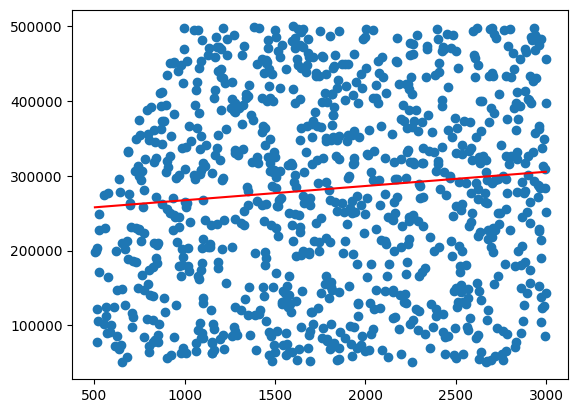


Coeff of determination:  0.0101735546150963

Mean Squared Error:  17085086442.576084


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:s\Advay\IIT Mumbai\WIDS\data.csv')

#Data cleaning, preprocessing
df = df.dropna()
df.drop_duplicates(inplace = True)
x = df[df.columns[0]]
y = df[df.columns[1]]

xbar = np.mean(x)
ybar = np.mean(y)


#removing outliers in x, y using their ratio:
z = y/x
Q1 = z.quantile(0.25)
Q3 = z.quantile(0.75)
IQR = Q3 - Q1
x = x[(z>=Q1 - 1.5*IQR) & (z<=Q3 + 1.5*IQR)]
y = y[(z>=Q1 - 1.5*IQR) & (z<=Q3 + 1.5*IQR)]

#calculating slope, intercept of linear regression line
nume = 0
deno = 0
for i, j in zip(x, y):
  nume = nume + (i - xbar)*(j - ybar)
  deno = deno + (i - xbar)*(i - xbar)

slope = nume/deno
intercept = ybar - slope*xbar

plt.scatter(x, y)

print()
print("Intercept of the line is:", intercept)
print("Slope of the line is:", slope)


#creating/plotting of the regression line:
x_dash = np.linspace(min(x), max(x), 100)
y_dash = slope*x_dash + intercept


plt.plot(x_dash, y_dash, color = 'red')
plt.show() 

#model predictions:
def y_predicted(x):
  return slope*x + intercept

#model accuracy evaluation:
ssf = 0
ssm = 0
for i,j in zip(x,y):
  ssf = ssf + (j - i*slope - intercept)*(j - i*slope - intercept)
  ssm = ssm + (j-ybar)*(j-ybar)

R_sq = (ssm - ssf)/ssm
mse = ssf/len(x)
print()
print('Coeff of determination: ', R_sq)
print()
print("Mean Squared Error: ", mse)

# Very small value of R^2 shows that the linear regression model is not a good fit for the given data as the line obtained is almost
# flat (horizontal) because the data points are widely scattered.
